# Exercise 4 - Fully Connected Networks and the MNIST dataset
This exercise is based on https://github.com/leriomaggio/deep-learning-keras-tensorflow



# The MNIST database

The MNIST (Modified National Institute of Standards and Technology) database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. The dataset  consists of 28x28 grayscale images of the 10 digits.

<img src='./mnist.png' style="height:400px; display:inline">

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

`from keras.datasets import mnist`<br>
`(X_train, y_train), (X_test, y_test) = mnist.load_data()`

The training set has $60,000$ samples. 
The test set has $10,000$ samples.
The digits are size-normalized and centered in a fixed-size image. 
The data page has description on how the data was collected. It also has reports the benchmark of various algorithms on the test dataset. 

## Task 1: Data preparation 
* Download the data
* Inspect the data and plot a few of the images using `matplotlib.pyplot.imshow` 
* Reshape the input data to be in vectorial form (original data are images)
* Convert the input data to do dtype `float32` using `astype` in order to scale it afterwards
* Normalize the design matrix to values between 0 and 1.
* How many classes do you have? How much data of each class?
* Convert the class vector to binary class matrices (**one-hot-vector**). Use the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.
* Split the training set into training and validation data (30%)

### Download the datasets and display first entry

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

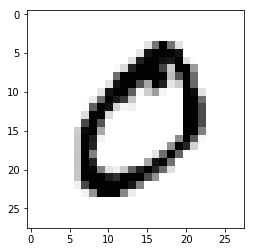

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
plt.imshow(X_train[1], cmap=cm.Greys)
plt.show()

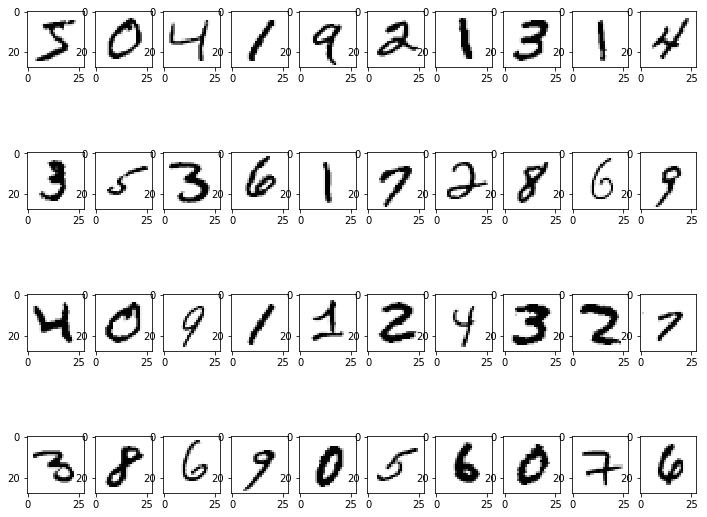

In [4]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], interpolation='nearest', cmap=cm.Greys)
plt.show()

### Reshape the datasets

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
X_train.shape

(60000, 784)

### Convert to float32 

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [10]:
X_train.dtype

dtype('float32')

### Scale the input data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
X_train[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

### Convert class vectors to binary class matrices

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

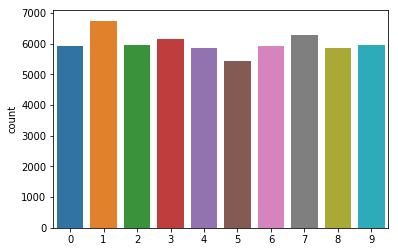

In [14]:
import seaborn as sns
sns.countplot(y_train)

In [15]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

#### Split Training and Validation Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train)

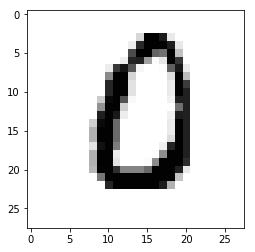

In [18]:
plt.imshow(X_train[1].reshape(28, 28), cmap=cm.Greys)

In [19]:
import numpy as np
print(np.asarray(range(10)))
print(Y_train[1].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0]


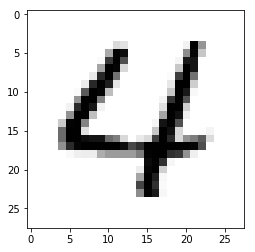

In [20]:
plt.imshow(X_val[0].reshape(28, 28), cmap=cm.Greys)

In [21]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 1 0 0 0 0 0]


## Task 2: Build and train a neural network
* Design a dense neural network structure. 
* Choose `softmax` as activation for the output node (normalized multi-class probability)
* Use `categorical_crossentropy` as loss function (multi-class version of crossentropy)
* Use `adam` as optimizer and a batch size of 512 (speed things up)
* Train the NN over 50 epochs and plot the evolution of the training and validation loss as well as of one meaningful metric. What do you observe?
* Evaluate the performance on the test set using `sklearn.metrics`
* Plot the probability of being a *Zero* for true zeros and for all other numbers

## Training

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_val, Y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 51us/step - loss: 0.4453 - acc: 0.8770 - val_loss: 0.2446 - val_acc: 0.9281
Epoch 2/50
42000/42000 [==============================] - 2s 46us/step - loss: 0.1658 - acc: 0.9520 - val_loss: 0.1724 - val_acc: 0.9479
Epoch 3/50
42000/42000 [==============================] - 2s 45us/step - loss: 0.1154 - acc: 0.9663 - val_loss: 0.1198 - val_acc: 0.9628
Epoch 4/50
42000/42000 [==============================] - 2s 46us/step - loss: 0.0904 - acc: 0.9739 - val_loss: 0.0990 - val_acc: 0.9701
Epoch 5/50
42000/42000 [==============================] - 2s 51us/step - loss: 0.0624 - acc: 0.9822 - val_loss: 0.0914 - val_acc: 0.9723
Epoch 6/50
42000/42000 [==============================] - 2s 53us/step - loss: 0.0526 - acc: 0.9845 - val_loss: 0.0830 - val_acc: 0.9748
Epoch 7/50
42000/42000 [==============================] - 2s 47us/step - loss: 0.0333 - acc: 0.9914 - val_loss: 0.0901 - val_acc

### Plotting the network history
As seen before, the return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and defined metric (accuracy) for each epoch. Let's define a function to plot the history:

In [24]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

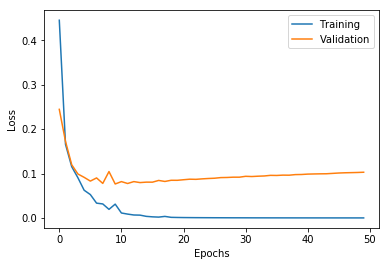

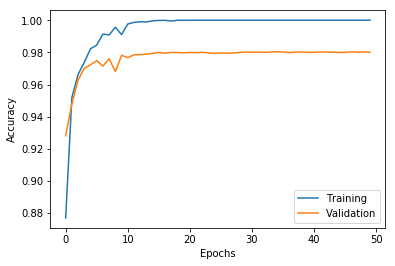

In [25]:
plot_history(history)

## Evaluation

In [26]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=256)
print loss_and_metrics

10000/10000 [==============================] - 0s 28us/step
[0.09768963857802318, 0.98050000000000004]


In [27]:
# Predict the values from the test dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_cls = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 


In [28]:
from sklearn.metrics import classification_report
print 'Classification Report:\n', classification_report(Y_true,Y_cls)

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.98      0.97      1032
          3       0.98      0.98      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.98      0.97      0.97       974
          9       0.98      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000



### Plotting the normalized probability prob_i = p_i / sum(p_i)

In multi-class problems the interpretation of the n-dimensional output is not always trivial, in particular if an output activation function is used which can not be interpreted as a probability. If one is only interested in distinguishing two of the classes one could build the ratio of these two class responses in order to get the best discrimination. Similarly, one could weight different classes according their importance for the specific problem. Because we have used a softmax activation together with the categorical cross-entropy we can directly interpret our output as probabilities and don't need to normalize it. If that is not the case you can define a multi-class probability for instance in the following way: 

In [29]:
def prob_multiclass(Y_pred, index):
    n_cls = len(Y_pred[0])

    Y_prob=[]
    for i in range(len(Y_pred)):
        numerator=Y_pred[i,index]
        denominator=0.0
        for idx in range(n_cls):
            denominator+=Y_pred[i,idx]
        
        Y_prob.append(numerator/denominator)
        
    return np.asarray(Y_prob)

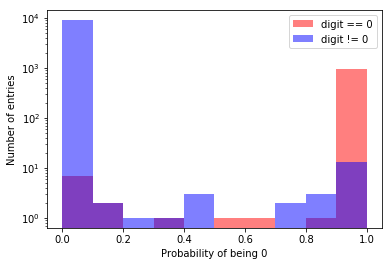

In [30]:
label=0
Y_pred_prob = prob_multiclass(Y_pred, label)
plt.hist(Y_pred_prob[Y_true == label], alpha=0.5, color='red', bins=10, log = True)
plt.hist(Y_pred_prob[Y_true != label], alpha=0.5, color='blue', bins=10, log = True)
plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
plt.xlabel('Probability of being 0')
plt.ylabel('Number of entries')
plt.show()

### Plot the confusion matrix

A good way to show the performance of a multi-class output is the confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [31]:
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

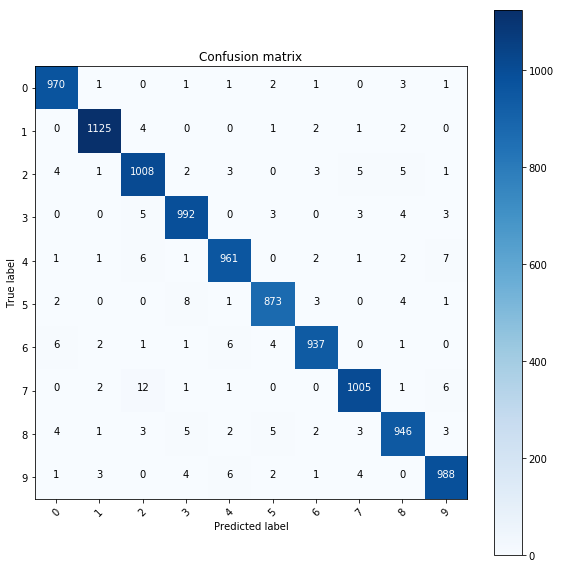

In [32]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_cls) 
# plot the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10))

### Plot wrong associations

 Errors are difference between predicted labels and true labels

In [33]:
errors = (Y_cls - Y_true != 0)

Y_cls_errors = Y_cls[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

Define plotting function

In [34]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap=cm.Greys, interpolation='nearest')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Rank errors by difference in probability

In [35]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]


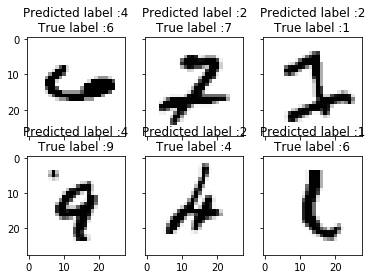

In [36]:
# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)

## Using Dropout Layers

As we have learned last time, the trainings and validation loss of the fit history is not comparable when using dropout. We can define our own callback function which calculates the loss and metric after each epoch for any dataset

In [37]:
from keras.callbacks import Callback

class HistoryEpoch(Callback):
    def __init__(self, data):
        self.data = data        
        
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.data
        l, a = self.model.evaluate(x, y, verbose=0)
        self.loss.append(l)
        self.acc.append(a)

## Task 3: Using regularizer


* Modify your previous example network by adding a Dropout layer after each hidden layer
* Add l2 regularization to the hidden layers
* Use the new defined `HistoryEpoch` for training, validation and test data set in order to save a comparable loss function and metric. This is done by e.g.: `train_hist=HistoryEpoch((X_train, Y_train))`. In the `fit` function you can call the callback then by specifying `callbacks=[train_hist]`.
* Plot the loss and metric evolution and compare the calculated loss with the default loss from the history
* Evaluate the performance of the NN as for the unregularized NN and compare the performance

In [38]:
from keras.layers.core import Dropout
from keras.regularizers import l2

dropout=0.5
l2_lambda = 0.0001

model_dropout = Sequential()
model_dropout.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=784))
model_dropout.add(Dropout(dropout))
model_dropout.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_dropout.add(Dropout(dropout))
model_dropout.add(Dense(10, activation='softmax'))

train_hist=HistoryEpoch((X_train, Y_train))
val_hist=HistoryEpoch((X_val, Y_val))
test_hist=HistoryEpoch((X_test, Y_test))


model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_dropout = model_dropout.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_val, Y_val), callbacks=[val_hist, train_hist, test_hist])


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 80us/step - loss: 0.7435 - acc: 0.7940 - val_loss: 0.3138 - val_acc: 0.9300
Epoch 2/50
42000/42000 [==============================] - 3s 64us/step - loss: 0.3466 - acc: 0.9219 - val_loss: 0.2443 - val_acc: 0.9491
Epoch 3/50
42000/42000 [==============================] - 4s 86us/step - loss: 0.2801 - acc: 0.9408 - val_loss: 0.2148 - val_acc: 0.9581
Epoch 4/50
42000/42000 [==============================] - 3s 77us/step - loss: 0.2390 - acc: 0.9515 - val_loss: 0.1933 - val_acc: 0.9643
Epoch 5/50
42000/42000 [==============================] - 3s 70us/step - loss: 0.2223 - acc: 0.9557 - val_loss: 0.1828 - val_acc: 0.9681
Epoch 6/50
42000/42000 [==============================] - 3s 72us/step - loss: 0.1979 - acc: 0.9633 - val_loss: 0.1730 - val_acc: 0.9693
Epoch 7/50
42000/42000 [==============================] - 3s 73us/step - loss: 0.1853 - acc: 0.9670 - val_loss: 0.1654 - val_acc

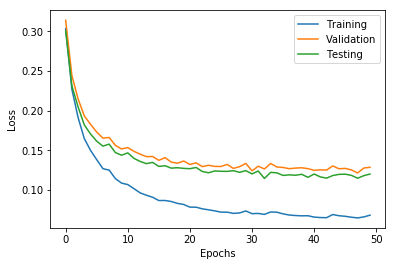

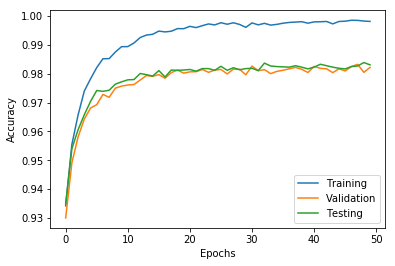

In [40]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_hist.loss)
plt.plot(val_hist.loss)
plt.plot(test_hist.loss)
plt.legend(['Training', 'Validation', 'Testing'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_hist.acc)
plt.plot(val_hist.acc)
plt.plot(test_hist.acc)
plt.legend(['Training', 'Validation', 'Testing'], loc='lower right')
plt.show()

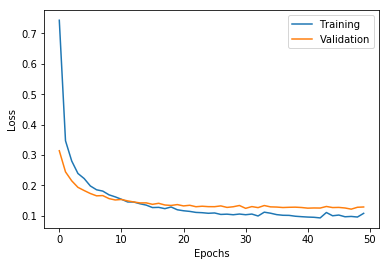

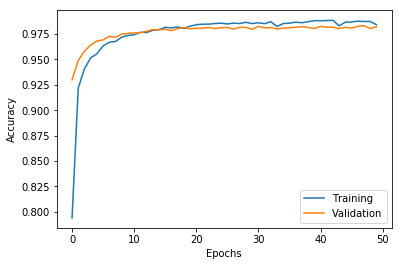

In [41]:
plot_history(history_dropout)

## Evaluation

In [42]:
loss_and_metrics = model_dropout.evaluate(X_test, Y_test, batch_size=256)
print loss_and_metrics

10000/10000 [==============================] - 0s 39us/step
[0.12014759578704834, 0.98309999999999997]


In [43]:
# Predict the values from the test dataset
Y_pred = model_dropout.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_cls = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 


In [44]:
from sklearn.metrics import classification_report
print 'Classification Report:\n', classification_report(Y_true,Y_cls)

Classification Report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.99      1010
          4       0.97      0.99      0.98       982
          5       0.99      0.98      0.99       892
          6       0.99      0.98      0.99       958
          7       0.98      0.98      0.98      1028
          8       0.98      0.97      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



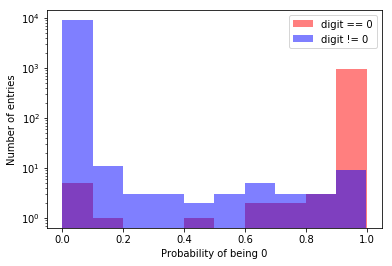

In [45]:
label=0
Y_pred_prob = prob_multiclass(Y_pred, label)
plt.hist(Y_pred_prob[Y_true == label], alpha=0.5, color='red', bins=10, log = True)
plt.hist(Y_pred_prob[Y_true != label], alpha=0.5, color='blue', bins=10, log = True)
plt.legend(['digit == 0', 'digit != 0'], loc='upper right')
plt.xlabel('Probability of being 0')
plt.ylabel('Number of entries')
plt.show()

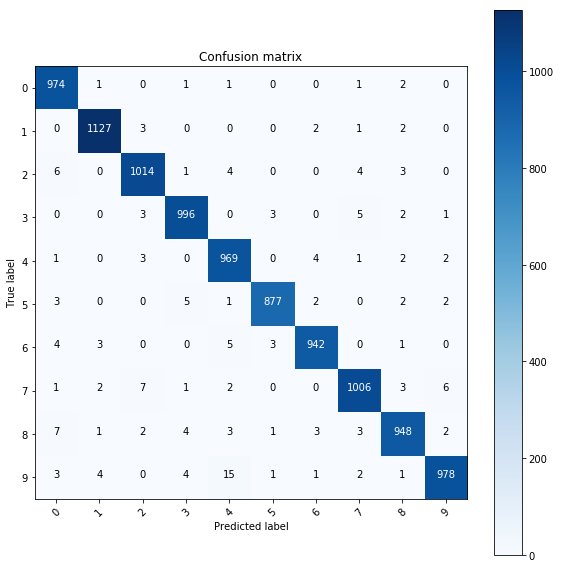

In [46]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_cls) 
# plot the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_mtx, classes = range(10))

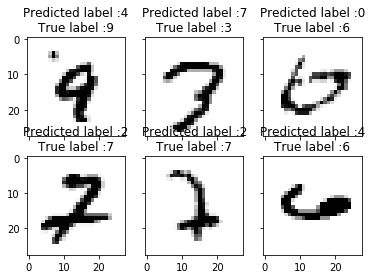

In [47]:
#errors
errors = (Y_cls - Y_true != 0)

Y_cls_errors = Y_cls[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]
# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_cls_errors, Y_true_errors)

## Early Stopping as a regularizer

* If you continue training, at some point the validation loss will start to increase: that is when the model starts to **overfit**. We can use EarlyStopping as a regularizer:

In [48]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#Also possible choice:
#early_stop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)

dropout=0.5

model_ES = Sequential()
model_ES.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=784))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_ES.add(Dropout(dropout))
model_ES.add(Dense(10, activation='softmax'))

model_ES.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dropout.summary()   


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_ES = model_ES.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, batch_size=256, verbose=1, 
             callbacks=[early_stop]) 

Train on 42000 samples, validate on 10000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.6138 - acc: 0.8329 - val_loss: 0.2602 - val_acc: 0.9456
Epoch 2/100
42000/42000 [==============================] - 5s 123us/step - loss: 0.3040 - acc: 0.9324 - val_loss: 0.2091 - val_acc: 0.9582
Epoch 3/100
42000/42000 [==============================] - 8s 186us/step - loss: 0.2485 - acc: 0.9494 - val_loss: 0.1901 - val_acc: 0.9656
Epoch 4/100
42000/42000 [==============================] - 6s 133us/step - loss: 0.2234 - acc: 0.9558 - val_loss: 0.1730 - val_acc: 0.9696
Epoch 5/100
42000/42000 [==============================] - 5s 117us/step - loss: 0.2007 - acc: 0.9622 - val_loss: 0.1605 - val_acc: 0.9724
Epoch 6/100
42000/42000 [==============================] - 4s 107us/step - loss: 0.1915 - acc: 0.9652 - val_loss: 0.1602 - val_acc: 0.9720
Epoch 7/100
42000/42000 [==============================] - 4s 102us/step - loss: 0.1752 - acc: 0.9695 - val_loss: 0.

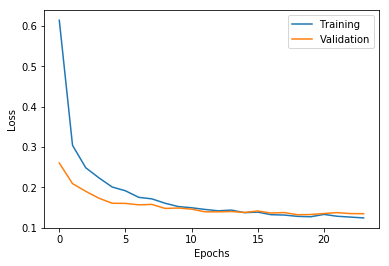

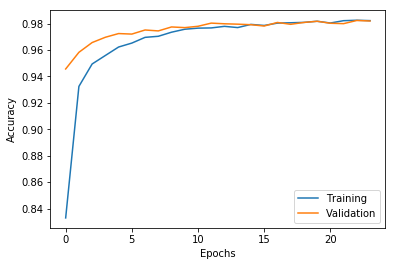

In [50]:
plot_history(history_ES)

---

# Bonus: Inspecting Layers

In [51]:
# We already used `summary`
model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### `model.layers` is iterable

In [52]:
print('Model Input Tensors: ', model.input)
print('Layers - Network Configuration:')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), )
print('Model Output Tensors: ', model.output)

('Model Input Tensors: ', <tf.Tensor 'dense_1_input:0' shape=(?, 784) dtype=float32>)
Layers - Network Configuration:
('dense_1', True)
Layer Configuration:
({'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'distribution': 'uniform', 'scale': 1.0, 'seed': None, 'mode': 'fan_avg'}}, 'name': 'dense_1', 'kernel_constraint': None, 'bias_regularizer': None, 'bias_constraint': None, 'dtype': 'float32', 'activation': 'relu', 'trainable': True, 'kernel_regularizer': None, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'units': 512, 'batch_input_shape': (None, 784), 'use_bias': True, 'activity_regularizer': None},)
('dense_2', True)
Layer Configuration:
({'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'distribution': 'uniform', 'scale': 1.0, 'seed': None, 'mode': 'fan_avg'}}, 'name': 'dense_2', 'kernel_constraint': None, 'bias_regularizer': None, 'bias_constraint': None, 'activation': 'relu', 'trainable': True, 'kernel_regularizer': None, 'bias

## Extract hidden layer representation of the given data

One **simple** way to do it is to use the weights of your model to build a new model that's truncated at the layer you want to read. 

Then you can run the `._predict(X_batch)` method to get the activations for a batch of inputs.

In [53]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(dropout))
model_truncated.add(Dense(256, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model_dropout.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [54]:
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

False

In [55]:
hidden_features = model_truncated.predict(X_train)

In [56]:
hidden_features.shape

(42000, 256)

In [57]:
X_train.shape

(42000, 784)

#### Hint: Alternative Method to get activations 

(Using `keras.backend` `function` on Tensors)

```python
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations
```

### Generate the Embedding of Hidden Features

Dimensionality reduction to dim=20 by using principal component analysis (PCA)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(hidden_features)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

Variance PCA: 0.950339972973


Dimensionality reduction to dim=2 by using t-distributed stochastic neighbor embedding (TSNE)

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(pca_result[:1000]) ## Reduced for computational issues

In [60]:
colors_map = np.argmax(Y_train, axis=1)

In [61]:
X_tsne.shape

(1000, 2)

In [62]:
nb_classes=10

In [63]:
np.where(colors_map==6)

(array([    2,     8,    23, ..., 41927, 41983, 41988]),)

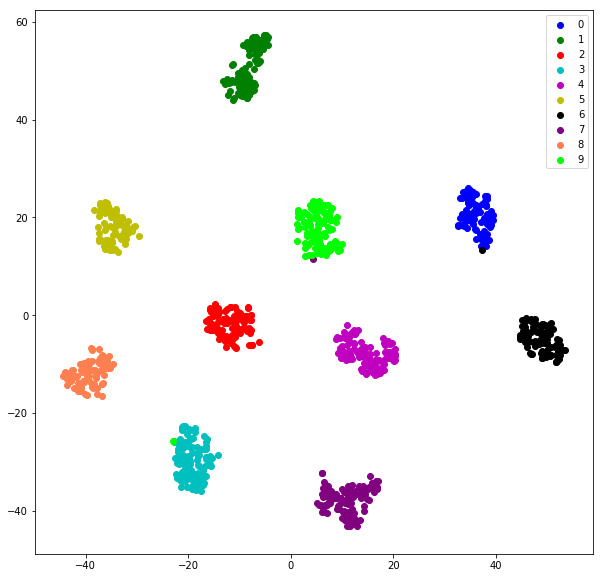

In [64]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = np.argmax(Y_train, axis=1)
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()